<a href="https://colab.research.google.com/github/AshutoshDas07/Fashion_Trend_Predictor_App/blob/master/Predicting_Trend/Trend_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Where the "cool stuff" happens - does final modifications to dataset and trains CNN model using dataset and predicts
"""
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = "/content/drive/MyDrive/Clustered.zip"
with ZipFile(zip_path) as myzip:
    files_in_zip = myzip.namelist()

corresponding_values = {}
cnt = 0;
for i in files_in_zip:
    corresponding_values[i]=cnt
    cnt = cnt + 1

print(len(files_in_zip))

2364


In [4]:
def clean(string):
   return string.split('\'')[1]

classes = 4
labels={'dresses': 0,
        'pants': 1,
        'shirts': 2,
        'skirts': 3}

cols = ['URL', 'Date', 'User', 'Tags', 'Description', 'Clothing']

X = []
Y = []

In [5]:
dresses = pd.read_csv('/content/drive/MyDrive/CSV/dresses.csv')
dresses.columns = cols
dresses['URL']=dresses['URL'].apply(clean)
dresses['Img'] = dresses['URL'].apply(lambda x: os.path.basename(x).replace('.jpg', ''))+dresses['Date']

for img in dresses['Img']:
    aux = img+'.jpg'
    if aux in files_in_zip:
        with ZipFile(zip_path) as myzip:
            with myzip.open(files_in_zip[corresponding_values[aux]]) as myfile:
                IMG = Image.open(myfile)
                IMG = IMG.resize((150,150))
                IMG = np.array(IMG)
                X.append(IMG)
                Y.append(labels['dresses'])

In [6]:
pants = pd.read_csv('/content/drive/MyDrive/CSV/pants.csv')
pants.columns = cols
pants['URL']=pants['URL'].apply(clean)
pants['Img'] = pants['URL'].apply(lambda x: os.path.basename(x).replace('.jpg', ''))+pants['Date']

for img in pants['Img']:
    aux = img+'.jpg'
    if aux in files_in_zip:
        with ZipFile(zip_path) as myzip:
            with myzip.open(files_in_zip[corresponding_values[aux]]) as myfile:
                IMG = Image.open(myfile)
                IMG = IMG.resize((150,150))
                IMG = np.array(IMG)
                X.append(IMG)
                Y.append(labels['pants'])

In [7]:
shirts = pd.read_csv('/content/drive/MyDrive/CSV/shirts.csv')
shirts.columns = cols
shirts['URL'] = shirts['URL'].apply(clean)
shirts['Img'] = shirts['URL'].apply(lambda x: os.path.basename(x).replace('.jpg', ''))+shirts['Date']

for img in shirts['Img']:
    aux = img+'.jpg'
    if aux in files_in_zip:
        with ZipFile(zip_path) as myzip:
            with myzip.open(files_in_zip[corresponding_values[aux]]) as myfile:
                IMG = Image.open(myfile)
                IMG = IMG.resize((150,150))
                IMG = np.array(IMG)
                X.append(IMG)
                Y.append(labels['shirts'])

In [8]:
skirts = pd.read_csv('/content/drive/MyDrive/CSV/skirts.csv')
skirts.columns = cols
skirts['URL'] = skirts['URL'].apply(clean)
skirts['Img'] = skirts['URL'].apply(lambda x: os.path.basename(x).replace('.jpg', ''))+skirts['Date']

for img in skirts['Img']:
    aux = img+'.jpg'
    if aux in files_in_zip:
        with ZipFile(zip_path) as myzip:
            with myzip.open(files_in_zip[corresponding_values[aux]]) as myfile:
                IMG = Image.open(myfile)
                IMG = IMG.resize((150,150))
                IMG = np.array(IMG)
                X.append(IMG)
                Y.append(labels['skirts'])

(1268, 150, 150, 3) (1268,)
3


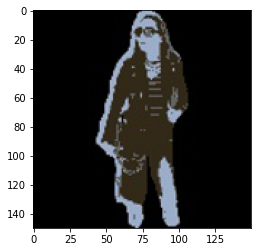

In [9]:
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)
plt.imshow(X[1267])
print(Y[1267])

In [10]:
X_train, X_test_dev, Y_train, Y_test_dev = train_test_split(X, Y, test_size = 0.1, random_state = 42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test_dev, Y_test_dev, test_size = 0.5, random_state = 42)

Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)
Y_dev = to_categorical(Y_dev, classes)

print(X_train.shape, X_test.shape, X_dev.shape)
print(Y_train.shape, Y_test.shape, Y_dev.shape)

(1141, 150, 150, 3) (63, 150, 150, 3) (64, 150, 150, 3)
(1141, 4) (63, 4) (64, 4)


In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(4, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 142, 142, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 71, 71, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 67, 67, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 64)        0

In [14]:
epochs = 32
history = model.fit(X_train, Y_train, batch_size=64, epochs=epochs, verbose=1, validation_data=(X_dev, Y_dev))

Epoch 1/32
18/18 [==============================] - 3s 152ms/step - loss: 40.7738 - accuracy: 0.2568 - val_loss: 1.3831 - val_accuracy: 0.3594
Epoch 2/32
18/18 [==============================] - 2s 102ms/step - loss: 1.3861 - accuracy: 0.2480 - val_loss: 1.3829 - val_accuracy: 0.2969
Epoch 3/32
18/18 [==============================] - 2s 102ms/step - loss: 1.3858 - accuracy: 0.2656 - val_loss: 1.3829 - val_accuracy: 0.2656
Epoch 4/32
18/18 [==============================] - 2s 102ms/step - loss: 1.3850 - accuracy: 0.2761 - val_loss: 1.3821 - val_accuracy: 0.2812
Epoch 5/32
18/18 [==============================] - 2s 103ms/step - loss: 1.3814 - accuracy: 0.2840 - val_loss: 1.3757 - val_accuracy: 0.2500
Epoch 6/32
18/18 [==============================] - 2s 103ms/step - loss: 1.3712 - accuracy: 0.3164 - val_loss: 1.3592 - val_accuracy: 0.2344
Epoch 7/32
18/18 [==============================] - 2s 103ms/step - loss: 1.3417 - accuracy: 0.3585 - val_loss: 1.3825 - val_accuracy: 0.2812
Epoch

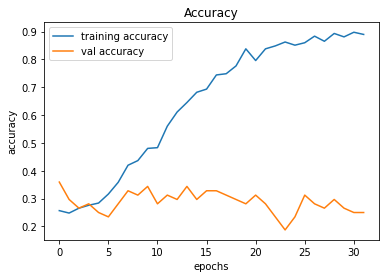

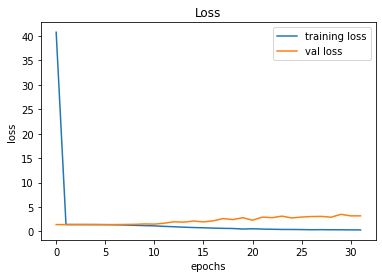

In [15]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

[3 1 2 ... 3 2 3]
[3 1 2 ... 3 2 3]
[0 1 2 3]


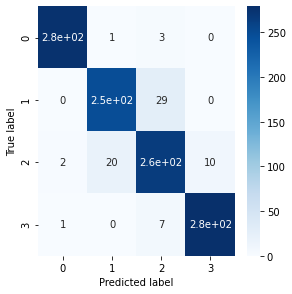

In [16]:
import sklearn
import tensorflow as tf
import pandas as pd
import seaborn as sns

y_true=np.argmax(Y_train,axis=-1)
y_pred=np.argmax(model.predict(X_train),axis=-1)

# print(accuracy_score(y_true, y_pred))

print(y_true)
print(y_pred)
print(np.unique(y_true))

classes=[i for i in range(4)]

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = con_mat

con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

2 2


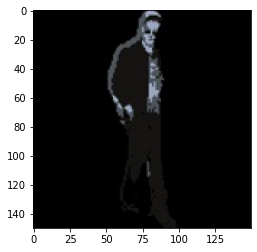

In [17]:
plt.imshow(X_train[32])
print(y_true[32], y_pred[32])

In [20]:
print(classification_report(y_true, y_pred, target_names=['Shirt', 'Skirt', 'Pant', 'Dress']))

              precision    recall  f1-score   support

       Shirt       0.99      0.99      0.99       280
       Skirt       0.92      0.90      0.91       277
        Pant       0.87      0.89      0.88       297
       Dress       0.97      0.97      0.97       287

    accuracy                           0.94      1141
   macro avg       0.94      0.94      0.94      1141
weighted avg       0.94      0.94      0.94      1141



In [21]:
model.save('model.h5')

In [24]:
### from here onwards, we will be analyzing the model after loading....
from keras.models import load_model
model = load_model('/content/model.h5')

[3 1 2 ... 3 2 3]
[3 1 2 ... 3 2 3]
[0 1 2 3]


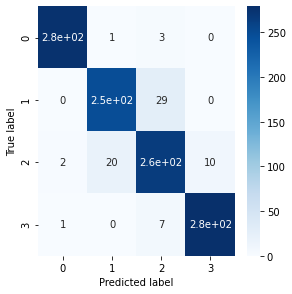

In [25]:
import sklearn
import tensorflow as tf
import pandas as pd
import seaborn as sns

y_true=np.argmax(Y_train,axis=-1)
y_pred=np.argmax(model.predict(X_train),axis=-1)

# print(accuracy_score(y_true, y_pred))

print(y_true)
print(y_pred)
print(np.unique(y_true))

classes=[i for i in range(4)]

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = con_mat

con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

3 3


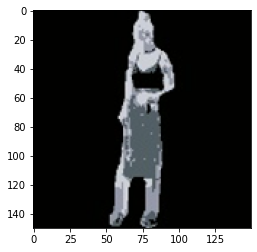

In [27]:
plt.imshow(X_train[78])
print(y_true[78], y_pred[78])

In [28]:
print(classification_report(y_true, y_pred, target_names=['Shirt', 'Skirt', 'Pant', 'Dress']))

              precision    recall  f1-score   support

       Shirt       0.99      0.99      0.99       280
       Skirt       0.92      0.90      0.91       277
        Pant       0.87      0.89      0.88       297
       Dress       0.97      0.97      0.97       287

    accuracy                           0.94      1141
   macro avg       0.94      0.94      0.94      1141
weighted avg       0.94      0.94      0.94      1141

